# Auswirkung der Aktivierungsfunktion auf neuronales Netz

#### Importe

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import r2_score as r2
from sklearn.metrics import max_error
import seaborn as sns

#### Default Datentyp Tensor

In [2]:
torch.set_default_dtype(torch.float64)

#### Laden des Train und Testloss über den Trainingsverlauf

In [3]:
# Standardisierungsdaten
loss_data_file_5 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_005_002.npz'
loss_data_5 = np.load(loss_data_file_5)
loss_data_file_20 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_005_010.npz'
loss_data_20 = np.load(loss_data_file_20)
loss_data_file_50 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_005_011.npz'
loss_data_50 = np.load(loss_data_file_50)
loss_data_file_100 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_005_012.npz'
loss_data_100 = np.load(loss_data_file_100)
loss_data_file_200 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_005_013.npz'
loss_data_200 = np.load(loss_data_file_200)

train_loss_5 = np.array(loss_data_5['train_loss'])
test_loss_5 = np.array(loss_data_5['test_loss'])
train_loss_20 = np.array(loss_data_20['train_loss'])
test_loss_20 = np.array(loss_data_20['test_loss'])
train_loss_50 = np.array(loss_data_50['train_loss'])
test_loss_50 = np.array(loss_data_50['test_loss'])
train_loss_100 = np.array(loss_data_100['train_loss'])
test_loss_100 = np.array(loss_data_100['test_loss'])
train_loss_200 = np.array(loss_data_200['train_loss'])
test_loss_200 = np.array(loss_data_200['test_loss'])

#### Importing Plot Stylesheet

In [4]:
plt.style.use(['seaborn-v0_8-paper',Path.cwd().parent / 'plotstyle' / 'paper.mplstyle'])

#### Plot loss vs epoch

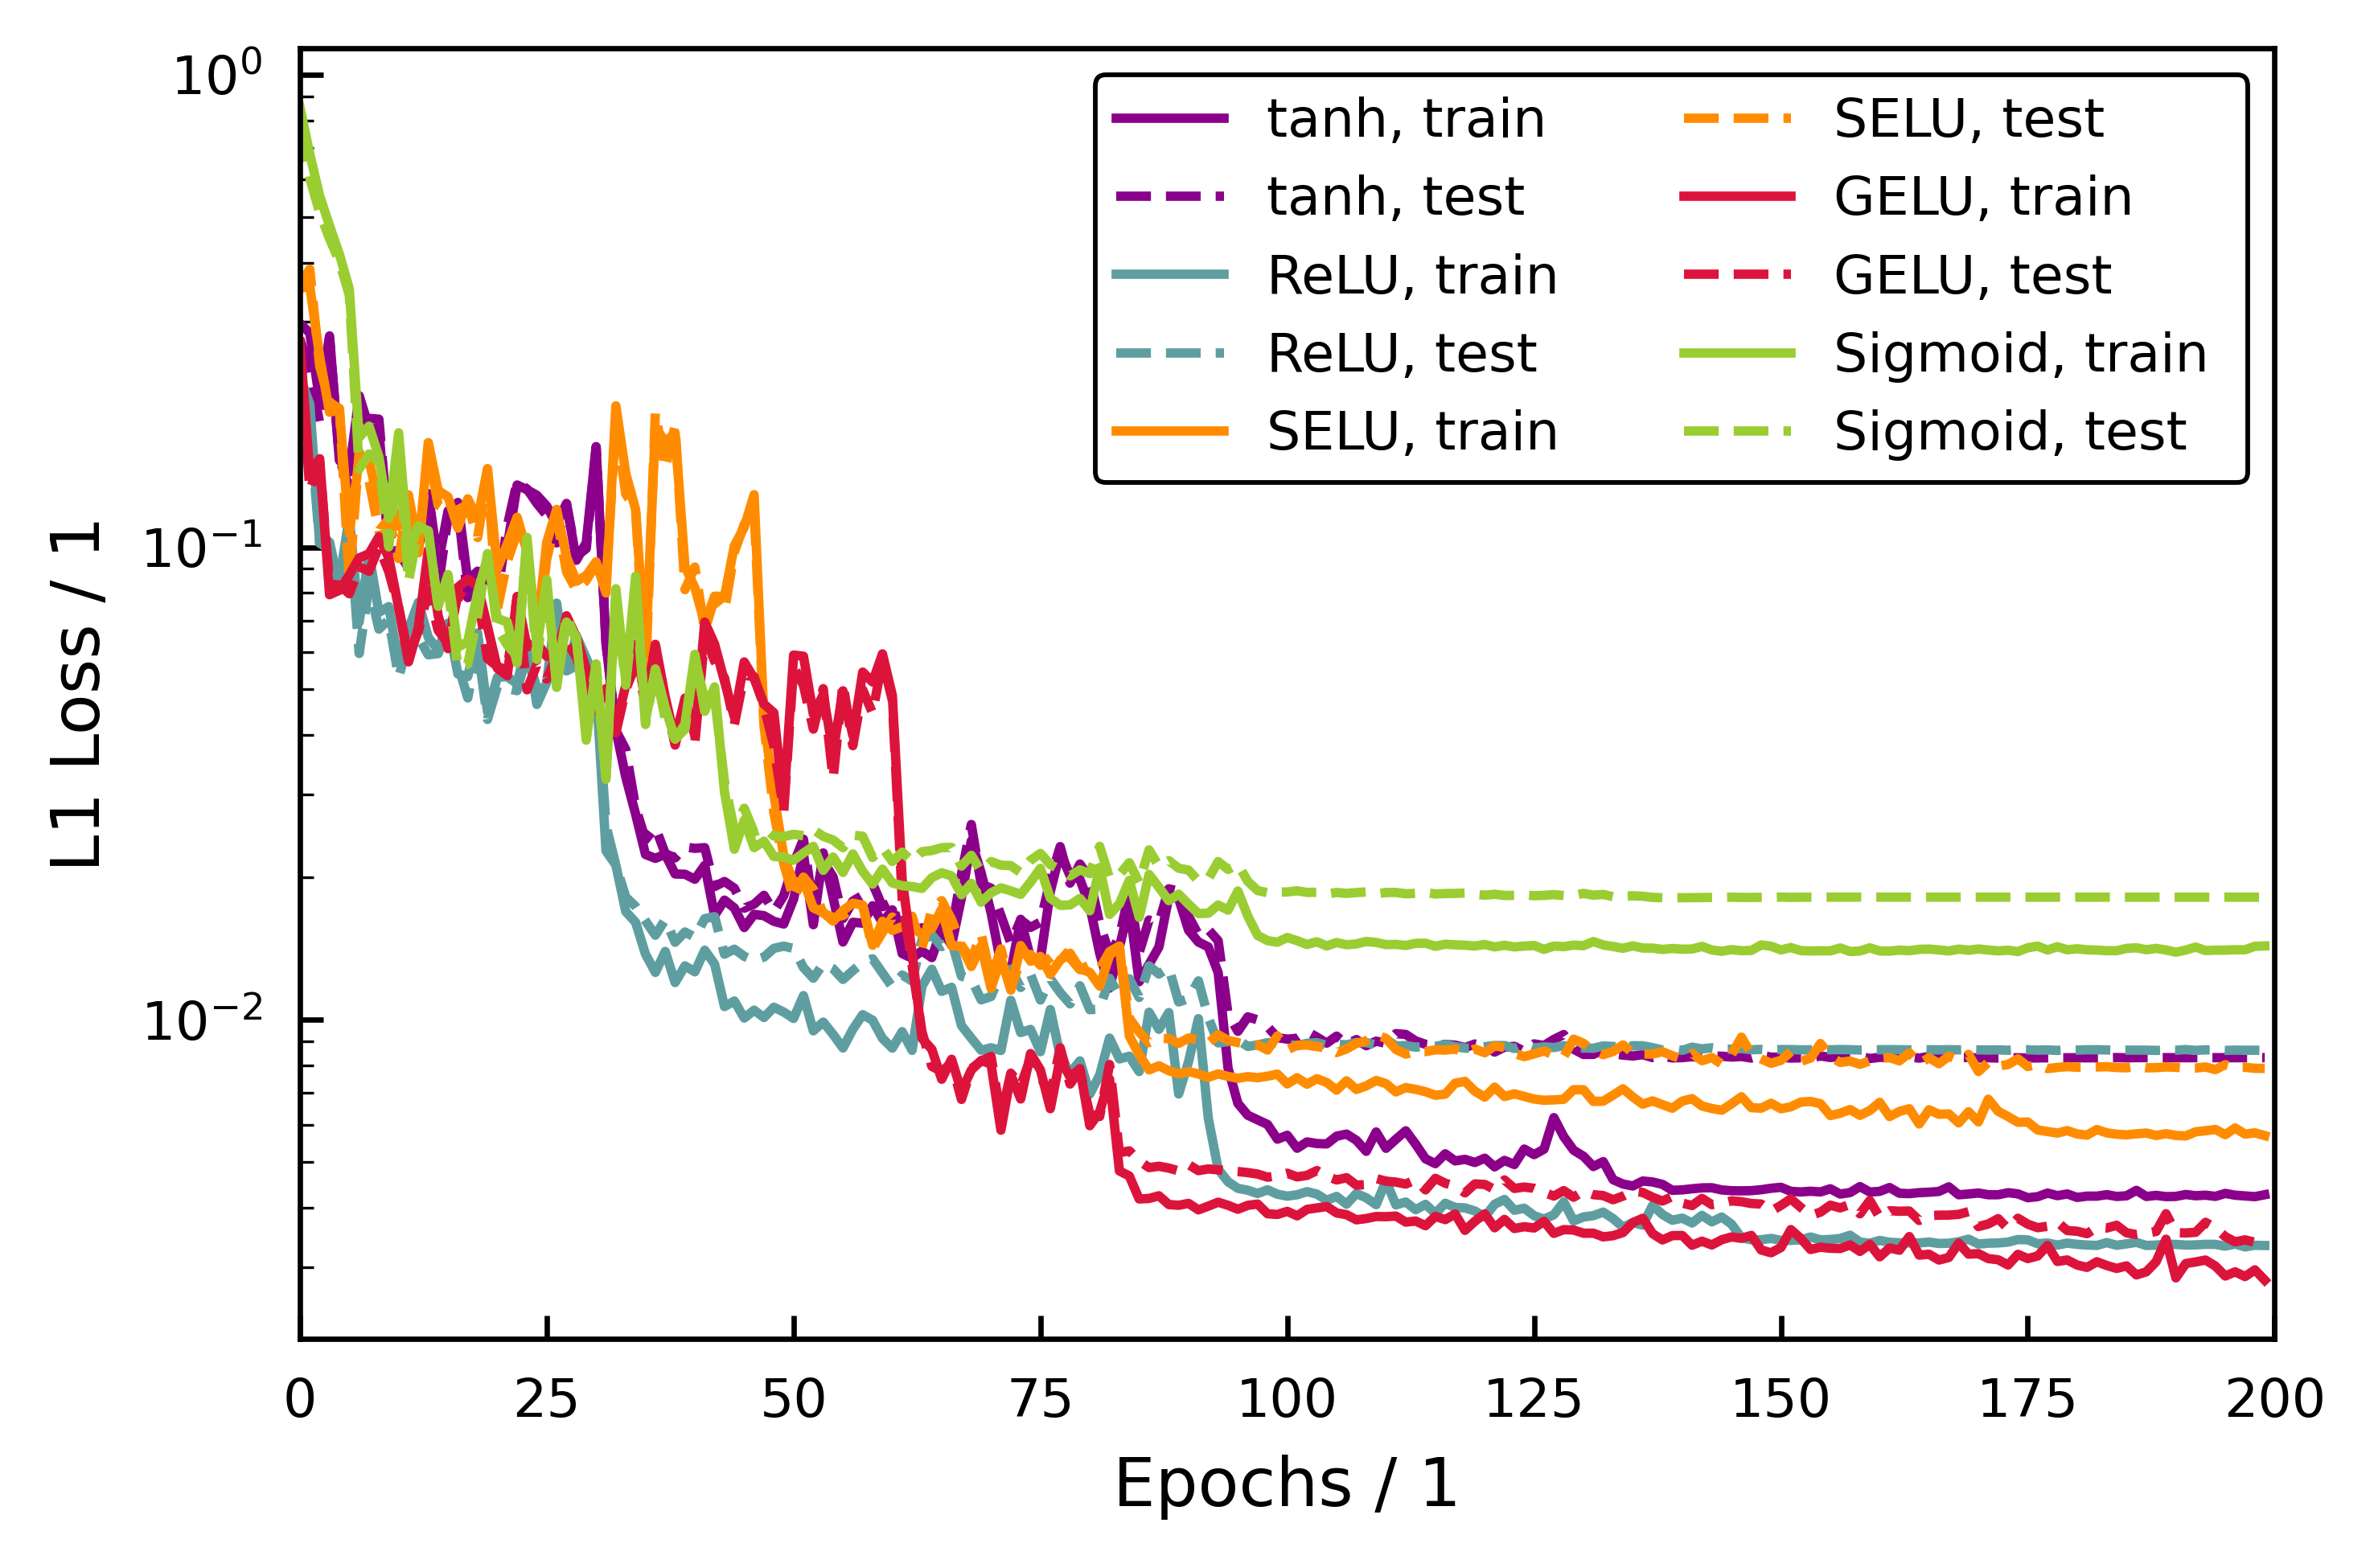

In [5]:
fig,ax = plt.subplots()

ax.semilogy(train_loss_5, '-', color = 'darkmagenta', label='tanh, train ')
ax.semilogy(test_loss_5, '--', color = 'darkmagenta', label='tanh, test')
ax.semilogy(train_loss_20, '-', color = 'cadetblue', label='ReLU, train ')
ax.semilogy(test_loss_20, '--', color = 'cadetblue', label='ReLU, test')
ax.semilogy(train_loss_50, '-', color = 'darkorange', label='SELU, train ')
ax.semilogy(test_loss_50, '--', color = 'darkorange', label='SELU, test')
ax.semilogy(train_loss_100, '-', color = 'crimson', label='GELU, train ')
ax.semilogy(test_loss_100, '--', color = 'crimson', label='GELU, test')
ax.semilogy(train_loss_200, '-', color = 'yellowgreen', label='Sigmoid, train ')
ax.semilogy(test_loss_200, '--', color = 'yellowgreen', label='Sigmoid, test')
#plt.title("Train and Test Loss")
ax.set(xlabel = 'Epochs / 1', ylabel = 'L1 Loss / 1') #Beschriftung Achsen; Kursiv durch $$; Index durch _{}
ax.set(xlim=(0,200))
ax.tick_params(direction = 'in') #, length = 20, width = 3)

plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

In [7]:
#fig.savefig(Path.cwd().parent / 'plots/ann/TKA_SRA_PA_021_activationfunction.png', bbox_inches = 'tight')